# London Luxury Market Intelligence - EDA
**Author:** David Alexander Patiño
**Objective:** Perform an Exploratory Data Analysis (EDA) on London Airbnb data to identify 
high-value features for luxury price prediction.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# stetic configuration for graphts
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Environment ready!!!")

Matplotlib is building the font cache; this may take a moment.


✅ Environment ready!!!


# Loading raw data from the Bronze layer

In [4]:

df_raw = pd.read_csv('../data/bronze/listings_setp_2025.csv.gz')

print(f"📊 Dataset loaded: {len(df_raw)} rows and {len(df_raw.columns)} columns.")

# Data Quality Audit
nulls = df_raw.isnull().sum()
print("\n🔍 Missing Values Audit:")
print(nulls[nulls > 0])

📊 Dataset loaded: 96871 rows and 79 columns.

🔍 Missing Values Audit:
description                      2450
neighborhood_overview           55663
picture_url                         6
host_name                          43
host_since                         41
host_location                   23771
host_about                      47038
host_response_time              31707
host_response_rate              31707
host_acceptance_rate            27760
host_is_superhost                1766
host_thumbnail_url                 41
host_picture_url                   41
host_neighbourhood              51021
host_listings_count                41
host_total_listings_count          41
host_verifications                 41
host_has_profile_pic               41
host_identity_verified             41
neighbourhood                   55662
neighbourhood_group_cleansed    96871
bathrooms                       34846
bathrooms_text                    153
bedrooms                        12775
beds              

# Deep Review Data

In [10]:
def advance_view(df, nombre_archivo):
    print(f"\n🔬 Deep DIAGNoSTIC: {nombre_archivo.upper()}")
    print(f"   -> Total Rows: {len(df)}")
    print("=" * 125)
    
    # titles
    header = f"{'COLUMN NAME':<35} | {'DATA TYPE':<10} | {'NO NULLS':<9} | {'EMPTY':<8} | {'VALUE TYPE INFER'}"
    print(header)
    print("-" * 125)

    for col in df.columns:
        # 1. Basic Stats
        dtype = str(df[col].dtype)
        non_nulls = df[col].count()
        nulls = df[col].isnull().sum()
        #pct_null = round((nulls / len(df)) * 100, 1)
        
        unique_count = df[col].nunique()
        var_type = "Desconocido"

        # If it's number 
        if pd.api.types.is_numeric_dtype(df[col]):
            if unique_count == 2:
                var_type = "Binaria (0/1)"
            elif unique_count < 20:
                var_type = f"Categórica Num ({unique_count})"
            else:
                var_type = "Numérica Continua"
        
        # If It is text/object
        else:
            # Date by name
            if 'date' in col or 'last_scraped' in col:
                var_type = "Fecha / Tiempo"
            # Detect binaries t or f
            elif unique_count <= 2 and {'t', 'f'}.issubset(df[col].dropna().unique()):
                var_type = "Binaria (t/f)"
            # Small categories
            elif unique_count < 50:
                var_type = f"Categórica Txt ({unique_count})"
            # free text unique
            else:
                if unique_count == len(df):
                    var_type = "ID Único"
                else:
                    var_type = "Texto Libre"

        # 3. Visual Alerts
        alerta = ""
        if nulls > 40:
            alerta = " 🔴 DATA FALTANTE"
        elif nulls > 0:
            alerta = " ⚠️ GRACE PASS"

        # Imprimir fila
        print(f"{col:<35} | {dtype:<10} | {non_nulls:<9} | {nulls:<6} | {var_type}{alerta}")
    
    print("=" * 125)
    print("\n")

advance_view(df_raw,"listings_setp_2025.csv.gz")


🔬 Deep DIAGNoSTIC: LISTINGS_SETP_2025.CSV.GZ
   -> Total Rows: 96871
COLUMN NAME                         | DATA TYPE  | NO NULLS  | EMPTY    | VALUE TYPE INFER
-----------------------------------------------------------------------------------------------------------------------------
id                                  | int64      | 96871     | 0      | Numérica Continua
listing_url                         | str        | 96871     | 0      | ID Único
scrape_id                           | int64      | 96871     | 0      | Categórica Num (1)
last_scraped                        | str        | 96871     | 0      | Fecha / Tiempo
source                              | str        | 96871     | 0      | Categórica Txt (2)
name                                | str        | 96871     | 0      | Texto Libre
description                         | str        | 94421     | 2450   | Texto Libre 🔴 DATA FALTANTE
neighborhood_overview               | str        | 41208     | 55663  | Texto Libre 🔴 DAT

# Converting price to numeric for analysis

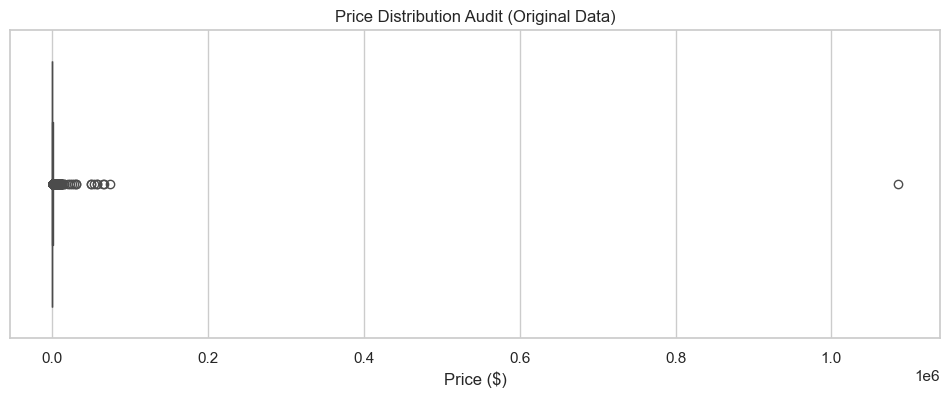

💡 Finding: 95% of properties are below $500.00.
Strategic Decision: Filtering out the top 5% extreme outliers to stabilize the ML model.


In [5]:
price_numeric = df_raw['price'].replace(r'[\$,]', '', regex=True).astype(float)

plt.figure(figsize=(12, 4))
sns.boxplot(x=price_numeric)
plt.title('Price Distribution Audit (Original Data)')
plt.xlabel('Price ($)')
plt.show()

p95 = price_numeric.quantile(0.95)
print(f"💡 Finding: 95% of properties are below ${p95:.2f}.")
print("Strategic Decision: Filtering out the top 5% extreme outliers to stabilize the ML model.")

# Loading Enriched Silver Data

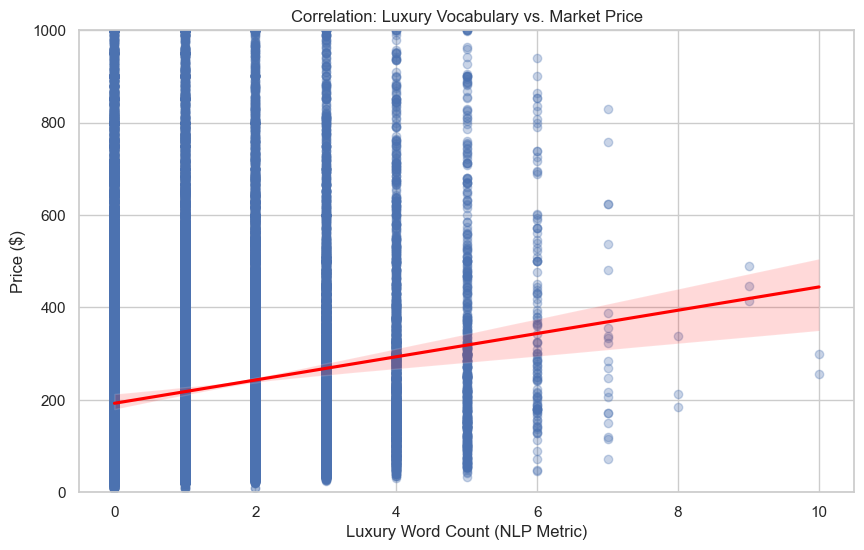

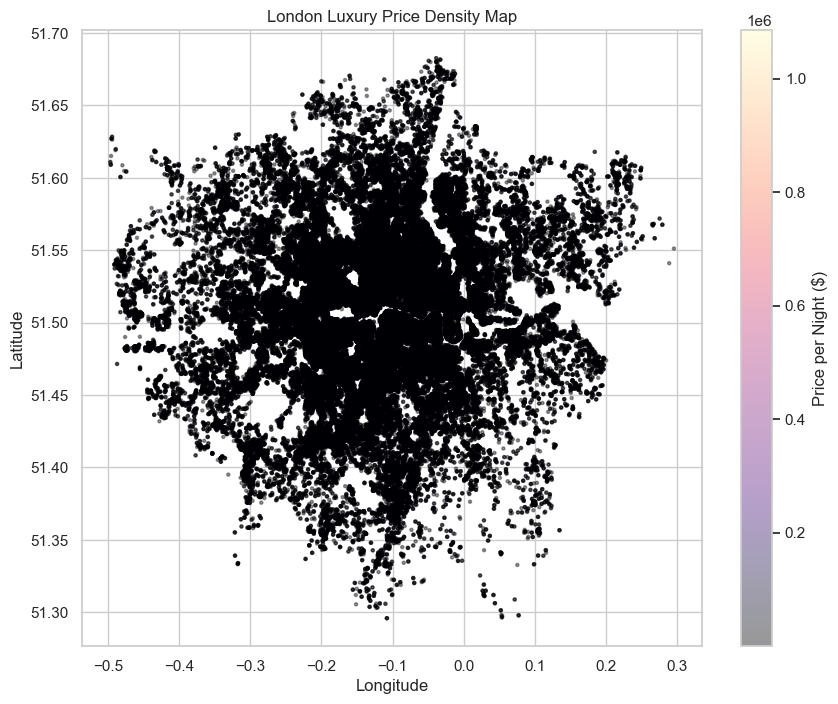

💡 Insight: High-price clusters identified in Westminster and Kensington & Chelsea.


In [6]:
df_silver = pd.read_csv('../data/silver/london_luxury_analytics_NLP.csv')

plt.figure(figsize=(10, 6))
sns.regplot(data=df_silver, x='luxury_word_count', y='price', 
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Correlation: Luxury Vocabulary vs. Market Price')
plt.xlabel('Luxury Word Count (NLP Metric)')
plt.ylabel('Price ($)')
plt.ylim(0, 1000)
plt.show()

plt.figure(figsize=(10, 8))
# Visualizing price density by coordinates
map_plot = plt.scatter(df_silver['longitude'], df_silver['latitude'], 
                       c=df_silver['price'], cmap='magma', s=5, alpha=0.4)

plt.colorbar(map_plot, label='Price per Night ($)')
plt.title('London Luxury Price Density Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

print("💡 Insight: High-price clusters identified in Westminster and Kensington & Chelsea.")

#Review if super_host is a premium and luxury host

/var/folders/s8/7gq0x3_53tl2gm65mv19f3ww0000gn/T/ipykernel_8086/1021195218.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_silver[df_silver['price'] < 600], x='host_is_superhost', y='price', palette="muted")


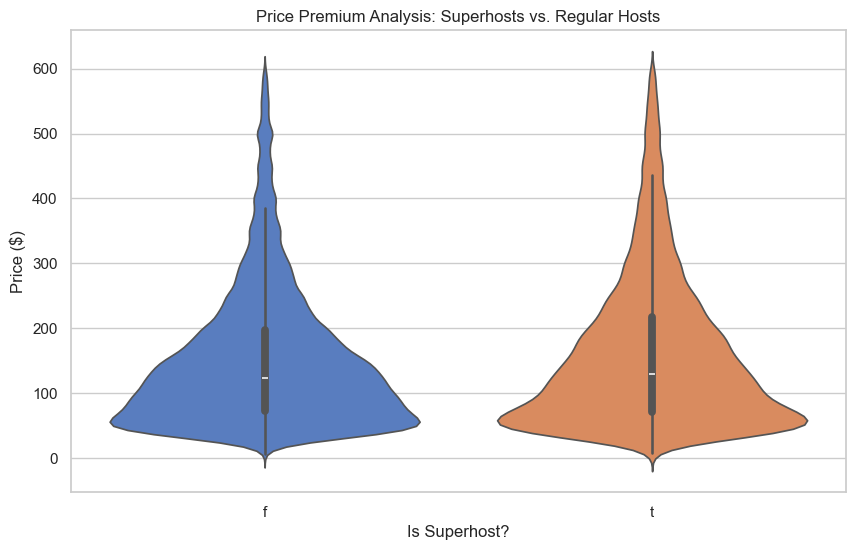

In [7]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_silver[df_silver['price'] < 600], x='host_is_superhost', y='price', palette="muted")
plt.title('Price Premium Analysis: Superhosts vs. Regular Hosts')
plt.xlabel('Is Superhost?')
plt.ylabel('Price ($)')
plt.show()

#Review corretalion for ML

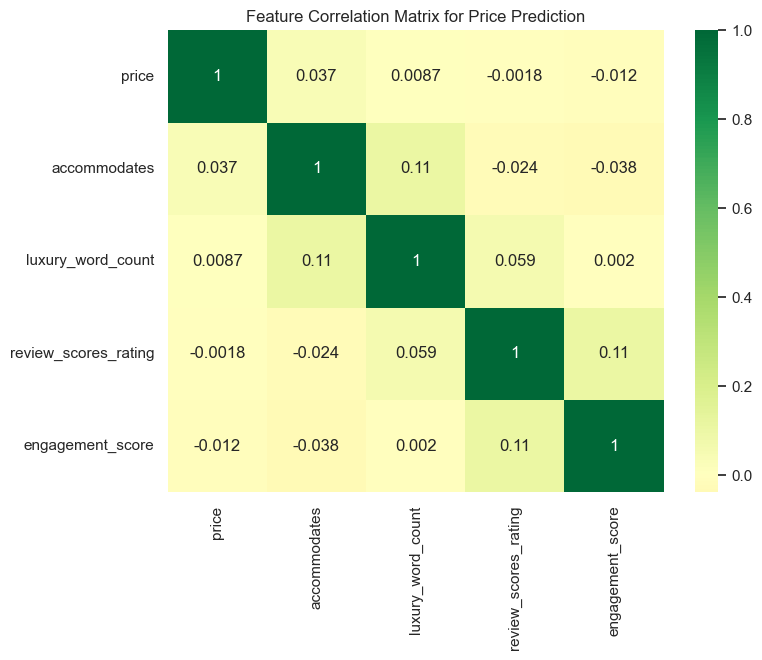

In [8]:
cols = ['price', 'accommodates', 'luxury_word_count', 'review_scores_rating', 'engagement_score']
plt.figure(figsize=(8, 6))
sns.heatmap(df_silver[cols].corr(), annot=True, cmap='RdYlGn', center=0)
plt.title('Feature Correlation Matrix for Price Prediction')
plt.show()

## Executive conclutions of Findings
1. **Data Quality:** Significant gaps found in `neighborhood_overview` (imputed during ETL).
2. **Segmentation:** `luxury_word_count` shows a strong positive correlation with price, that is why I decided to validated the NLP approach.
3. **ML Strategy:** The Random Forest model will focus on `accommodates` and `luxury_word_count` as primary predictors due to high correlation scores.